In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir_gams = "~/codes/CIAM-Work/gams-outputs/gams-results"

### RCP8.5 baseline results from Diaz 2016

file names

In [3]:
files_rcp85 = ["rcp85p50ref"+str(k)+".csv" for k in range(1,11)]

read the files, place in a list of Pandas DataFrames

In [4]:
dfG85_all = []
for file in files_rcp85:
    dfG85_all.append(pd.read_csv(dir_gams+"/rcp85/"+file))

concatenate all into a master file. don't worry about the times being out of order; the calculations will specify the year and type of damages to be summed up later

In [5]:
dfG85 = pd.concat(dfG85_all)

remove the list of DataFrames to save on some memory

In [6]:
del dfG85_all

Rename segments with apostrophes

In [260]:
for seg in dfG85.segments.unique():
    if '\'' in seg:
        new_name = seg.replace('\'', '') 
        dfG85.loc[(dfG85.segments==seg), "segments"] = new_name

In [7]:
dfG85["variable"].unique()

array(['FloodRetreat', 'RetreatCost', 'WetlandRetreat', 'RelocateRetreat',
       'StormCapitalRetreat', 'StormPopRetreat', 'Construct',
       'ProtectCost', 'WetlandProtect', 'StormCapitalProtect',
       'StormPopProtect', 'FloodNoAdapt', 'NoAdaptCost', 'WetlandNoAdapt',
       'RelocateNoAdapt', 'StormCapitalNoAdapt', 'StormPopNoAdapt',
       'FloodOptimalFixed', 'OptimalFixedCost', 'WetlandOptimalFixed',
       'RelocateOptimalFixed', 'StormCapitalOptimalFixed',
       'StormPopOptimalFixed', 'ConstructOptimalFixed'], dtype=object)

Gather up Diaz 2016 results into a DataFrame

In [8]:
NoAdaptCost, OptimalCost, FloodNoAdapt, WetlandNoAdapt, RelocateNoAdapt, StormCapitalNoAdapt, StormPopNoAdapt = [], [], [], [], [], [], []
Construct, ProtectCost, WetlandProtect, StormPopProtect, StormCapitalProtect = [], [], [], [], []
RetreatCost, WetlandRetreat, StormPopRetreat, StormCapitalRetreat, RelocateRetreat = [], [], [], [], []
for t in range(1,11):
    NoAdaptCost.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="NoAdaptCost"), "value"].sum())
    OptimalCost.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="OptimalFixedCost"), "value"].sum())
    FloodNoAdapt.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="FloodNoAdapt"), "value"].sum())
    WetlandNoAdapt.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="WetlandNoAdapt"), "value"].sum())
    RelocateNoAdapt.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="RelocateNoAdapt"), "value"].sum())
    StormCapitalNoAdapt.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="StormCapitalNoAdapt"), "value"].sum())
    StormPopNoAdapt.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="StormPopNoAdapt"), "value"].sum())
    Construct.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="ConstructOptimalFixed"), "value"].sum())
    ProtectCost.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="ProtectCost"), "value"].sum())
    WetlandProtect.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="WetlandProtect"), "value"].sum())
    StormPopProtect.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="StormPopProtect"), "value"].sum())
    StormCapitalProtect.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="StormCapitalProtect"), "value"].sum())
    RetreatCost.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="RetreatCost"), "value"].sum())
    WetlandRetreat.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="WetlandRetreat"), "value"].sum())
    StormPopRetreat.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="StormPopRetreat"), "value"].sum())
    StormCapitalRetreat.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="StormCapitalRetreat"), "value"].sum())
    RelocateRetreat.append(dfG85.loc[(dfG85["time"]==t) & (dfG85["variable"]=="RelocateRetreat"), "value"].sum())

dfDiaz = pd.DataFrame()
dfDiaz["time"] = list(range(2010,2110,10))
dfDiaz["NoAdapt"] = NoAdaptCost
dfDiaz["Optimal"] = OptimalCost
dfDiaz["FloodNoAdapt"] = FloodNoAdapt
dfDiaz["WetlandNoAdapt"] = WetlandNoAdapt
dfDiaz["RelocateNoAdapt"] = RelocateNoAdapt
dfDiaz["StormCapitalNoAdapt"] = StormCapitalNoAdapt
dfDiaz["StormPopNoAdapt"] = StormPopNoAdapt
dfDiaz["Construct"] = Construct
dfDiaz["ProtectCost"] = ProtectCost
dfDiaz["WetlandProtect"] = WetlandProtect
dfDiaz["StormPopProtect"] = StormPopProtect
dfDiaz["StormCapitalProtect"] = StormCapitalProtect
dfDiaz["RetreatCost"] = RetreatCost
dfDiaz["WetlandRetreat"] = WetlandRetreat
dfDiaz["StormPopRetreat"] = StormPopRetreat
dfDiaz["StormCapitalRetreat"] = StormCapitalRetreat
dfDiaz["RelocateRetreat"] = RelocateRetreat

Matches the paper well (Fig 2, right column), except in the last year when things jump up just a bit too much. Paper reports \\$2.2T in the NoAdapt case and \\$270B in the Optimal adaptation case.

In [9]:
print(np.round(dfDiaz[["time","NoAdapt","Optimal"]],2))

   time  NoAdapt  Optimal
0  2010   119.17    29.27
1  2020   189.34    33.03
2  2030   304.23    39.72
3  2040   484.77    52.75
4  2050   787.10   115.54
5  2060  1217.03   132.09
6  2070  1566.37   148.21
7  2080  1878.13   163.73
8  2090  2043.67   178.02
9  2100  2251.46   282.07


### New results

In [76]:
dfC2 = pd.read_csv("./output/lslOld_pop0_global_85p50ssp0fixed_test.csv") # same as C1, but with some testing going on for optimalcost situation
dfC1 = pd.read_csv("./output/lslOld_pop0_global_85p50ssp0fixed_noConstrFix_all.csv") # all segments, Hprev > H fix removed
dfC0 = pd.read_csv("./output/lslOld_pop0_global_85p50ssp0fixed_all.csv") # all segments, with Hprev > H fix in there

In [60]:
dfN2 = pd.read_csv("./output/lslOld_pop0_seg_85p50ssp0fixed_test.csv") # segment costs file
#dfN1 = pd.read_csv("./output/lslOld_pop0_seg_85p50ssp0fixed_noConstrFix_all.csv") # segment costs file
#dfO1 = pd.read_csv("./output/lslOld_pop0_seg_85p50ssp0fixed_optimal_noConstrFix_all.csv") # optimal actions for each segment
#dfN0 = pd.read_csv("./output/lslOld_pop0_seg_85p50ssp0fixed_noConstrFix_all.csv") # segment costs file
#dfO0 = pd.read_csv("./output/lslOld_pop0_seg_85p50ssp0fixed_optimal_noConstrFix_all.csv") # optimal actions for each segment

In [12]:
def compare(dfD, dfN, var, lev=False, times=list(range(1,11)), verbose=True):
    varD = var
    names = {"OptimalCost" : "OptimalFixedCost"}#, "Construct" : "ConstructOptimalFixed"}
    if var in names.keys():
        varD = names[var]
    if lev:
        D = [dfD.loc[(dfD.variable==varD) & (dfD.level==lev) & (dfD.time==t), "value"].sum() for t in times]
        N = list(dfN.loc[(dfN.variable==var) & (dfN.level==lev) & (dfN.time>=times[0]) & (dfN.time<=np.max(times)), "value"])
    else:
        D = [dfD.loc[(dfD.variable==varD) & (dfD.time==t), "value"].sum() for t in times]
        N = list(dfN.loc[(dfN.variable==var) & (dfN.time>=times[0]) & (dfN.time<=np.max(times)), "value"])
    if verbose:
        print("time | Diaz | New")
        for t in range(len(times)):
            print(times[t], np.round(D[t],3), np.round(N[t],3))
    return [N[t]-D[t] for t in range(len(times))]

In [102]:
dfC["variable"].unique()

array(['FloodNoAdapt', 'RelocateNoAdapt', 'StormCapitalNoAdapt',
       'NoAdaptCost', 'OptimalCost', 'WetlandProtect', 'StormPopNoAdapt',
       'WetlandRetreat', 'WetlandNoAdapt', 'StormPopProtect',
       'StormCapitalProtect', 'ProtectCost', 'Construct',
       'StormCapitalRetreat', 'StormPopRetreat', 'RetreatCost',
       'FloodRetreat', 'RelocateRetreat'], dtype=object)

In [103]:
dfG85["variable"].unique()

array(['FloodRetreat', 'RetreatCost', 'WetlandRetreat', 'RelocateRetreat',
       'StormCapitalRetreat', 'StormPopRetreat', 'Construct',
       'ProtectCost', 'WetlandProtect', 'StormCapitalProtect',
       'StormPopProtect', 'FloodNoAdapt', 'NoAdaptCost', 'WetlandNoAdapt',
       'RelocateNoAdapt', 'StormCapitalNoAdapt', 'StormPopNoAdapt',
       'FloodOptimalFixed', 'OptimalFixedCost', 'WetlandOptimalFixed',
       'RelocateOptimalFixed', 'StormCapitalOptimalFixed',
       'StormPopOptimalFixed', 'ConstructOptimalFixed'], dtype=object)

Checking NoAdaptCost...

In [247]:
x = compare(dfG85, dfC0, var="NoAdaptCost", lev=False, times=list(range(1,12)), verbose=True)
print("")
x = compare(dfG85, dfC1, var="NoAdaptCost", lev=False, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 119.166 119.166
2 189.336 189.336
3 304.226 304.226
4 484.775 484.775
5 787.095 787.095
6 1217.032 1217.038
7 1566.374 1566.376
8 1878.132 1878.142
9 2043.672 2043.716
10 2251.458 2251.467
11 2635.751 2635.751

time | Diaz | New
1 119.166 119.166
2 189.336 189.336
3 304.226 304.226
4 484.775 484.775
5 787.095 787.095
6 1217.032 1217.038
7 1566.374 1566.376
8 1878.132 1878.142
9 2043.672 2043.716
10 2251.458 2251.467
11 2635.751 2635.751


In [248]:
x = compare(dfG85, dfC2, var="NoAdaptCost", lev=False, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 119.166 119.166
2 189.336 189.336
3 304.226 304.226
4 484.775 484.775
5 787.095 787.095
6 1217.032 1217.038
7 1566.374 1566.376
8 1878.132 1878.142
9 2043.672 2043.716
10 2251.458 2251.467
11 2635.751 2635.751


Good!

Checking OptimalCost...

In [77]:
x = compare(dfG85, dfC2, var="OptimalCost", lev=False, times=list(range(1,12)), verbose=True)
print("")
x = compare(dfG85, dfC1, var="OptimalCost", lev=False, times=list(range(1,12)), verbose=True)
print("")
x = compare(dfG85, dfC0, var="OptimalCost", lev=False, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 29.274 27.608
2 33.032 31.593
3 39.718 38.638
4 52.752 52.064
5 115.535 124.3
6 132.086 143.298
7 148.209 161.838
8 163.731 180.723
9 178.017 197.697
10 282.067 325.643
11 303.188 352.242

time | Diaz | New
1 29.274 27.608
2 33.032 31.593
3 39.718 38.638
4 52.752 52.064
5 115.535 124.3
6 132.086 143.298
7 148.209 161.838
8 163.731 180.723
9 178.017 197.697
10 282.067 325.643
11 303.188 352.242

time | Diaz | New
1 29.274 27.608
2 33.032 31.593
3 39.718 38.638
4 52.752 52.064
5 115.535 124.3
6 132.086 143.298
7 148.209 161.838
8 163.731 180.723
9 178.017 197.697
10 282.067 325.643
11 303.188 352.242


Not good! Also of note: the Construct fix (Hprev > H) does not change optimal costs (C1 vs C0)

All other costs match. So... figure out what the heck is wrong with optimal costs


No adapt cost matches, but that shouldn't have been found to be the optimal action...

## optimal cost correction for the adaptation period/time horizon issue

### get the segments that are in the new CIAM results but the GAMS results

In [305]:
segments_G, segments_N = {}, {}
for t in range(1,21):
    segments_G[t] = list(dfG85.loc[(dfG85.time==t), "segments"].unique())
    segments_N[t] = list(dfN1.loc[(dfN1.time==t), "segments"].unique())
    print(t, len(segments_G[t]), len(segments_N[t]), len(set.intersection(set(segments_G[t]), set(segments_N[t]))))
segments_G["all"] = list(dfG85.segments.unique())
segments_N["all"] = list(dfN1.segments.unique())

1 12148 12148 12148
2 12148 12148 12148
3 12148 12148 12148
4 12148 12148 12148
5 12148 12148 12148
6 12148 12148 12148
7 12148 12148 12148
8 12148 12148 12148
9 12148 12148 12148
10 12148 12148 12148
11 12148 12148 12148
12 12148 12148 12148
13 12148 12148 12148
14 12148 12148 12148
15 12148 12148 12148
16 12148 12148 12148
17 12148 12148 12148
18 12148 12148 12148
19 12148 12148 12148
20 12148 12148 12148


### get the segments that don't match

`bad_segs_again` will only have segments that are in the GAMS results file.

In [393]:
t = 1
tol= 0.0001
dfGO = dfG85.loc[(dfG85.variable=="OptimalFixedCost") & (dfG85.time==t)]
dfNO = dfN1.loc[(dfN1.variable=="OptimalCost") & (dfN1.time==t)]
bad_segs_again = []
#for seg in list(set.intersection(set(segments_G[t]),set(segments_N[t]))):
for seg in dfGO.loc[(dfGO.time==t), "segments"].unique():
    D = float(dfGO.loc[(dfGO.segments==seg), "value"])
    N = float(dfNO.loc[(dfNO.segments==seg), "value"])
    if np.abs(D-N) > tol:
        bad_segs_again.append(seg)

### discount factor 

Matches output from a run model in Julia `m[:slrcost, :discountfactor]`

`v.discountfactor[TimestepIndex(i)] = 1/(1 + p.discountrate)^(p.tstep * (i-1))`

In [296]:
drate = 0.04
tstep = 10
discountfactor = 1/(1+drate)**(tstep*np.arange(0,20,1))
print(discountfactor)

[1.00000000e+00 6.75564169e-01 4.56386946e-01 3.08318668e-01
 2.08289045e-01 1.40712615e-01 9.50604010e-02 6.42194008e-02
 4.33843261e-02 2.93088962e-02 1.98000401e-02 1.33761976e-02
 9.03647984e-03 6.10472199e-03 4.12413144e-03 2.78611543e-03
 1.88219975e-03 1.27154671e-03 8.59011398e-04 5.80317321e-04]


### subsets of the big dataframes because searching these with .loc will be a lot faster

In [308]:
dfN1sub = dfN1.loc[(dfN1.segments.isin(bad_segs_again))]
dfO1sub = dfO1.loc[(dfO1.segments.isin(bad_segs_again))]
dfG1sub = dfG85.loc[(dfG85.segments.isin(bad_segs_again))]

In [309]:
orig_optcost_all = dfC1.loc[(dfC1.variable=="OptimalCost"), "value"]

t = 1
levs = {"RetreatCost" : [1,10,100,1000,10000], "ProtectCost" : [10,100,1000,10000], "NoAdaptCost" : [0]}
orig_optcost = dfC1.loc[(dfC1.variable=="OptimalCost") & (dfC1.time==t), "value"]

### what were the GAMS costs for these segments?

In [310]:
gams_actions = []
gams_costs = []
for seg in bad_segs_again:
    gams_opt_cost = float(dfG1sub.loc[(dfG1sub.segments==seg) & (dfG1sub.time==t) & (dfG1sub.variable=="OptimalFixedCost"), "value"])
#    gams_actions.append(str(dfG1sub.loc[(dfG1sub.segments==seg) & (dfG1sub.time==t) & (dfG1sub.value==gams_opt_cost), ["variable","level"]].iloc[0]["variable"])+ \
#                        str(int(dfG1sub.loc[(dfG1sub.segments==seg) & (dfG1sub.time==t) & (dfG1sub.value==gams_opt_cost), ["variable","level"]].iloc[0]["level"])))
    gams_costs.append(gams_opt_cost)

In [312]:
np.sum(gams_costs)

5.7232332470000005

### what are the possible adaptation decisions/levels?

In [318]:
options = []
for var in ["RetreatCost","ProtectCost"]:
    for lev in levs[var]:
            options.append(var+str(lev))
options.append("NoAdaptCost0")

In [396]:
A = {"a" : [1,2], "b": 0}
for x in A.keys():
    print(A[x])

[1, 2]
0


In [319]:
print(options)

['RetreatCost1', 'RetreatCost10', 'RetreatCost100', 'RetreatCost1000', 'RetreatCost10000', 'ProtectCost10', 'ProtectCost100', 'ProtectCost1000', 'ProtectCost10000', 'NoAdaptCost0']


Might have an issue leaving out the 0 levels... we'll see.

In [383]:
new_costs, new_NPV = [], []
new_choices = []
old_costs = []
for seg in bad_segs_again:
    option_costs = []
    for var in ["RetreatCost","ProtectCost","NoAdaptCost"]:
        for lev in levs[var]:
            if var != "NoAdaptCost":
                NPV = dfN1sub.loc[(dfN1sub.variable==var) & (dfN1sub.segments==seg) & 
                                  (dfN1sub.level==lev), "value"]*discountfactor
            else:
                NPV = dfN1sub.loc[(dfN1sub.variable==var) & (dfN1sub.segments==seg),"value"]*discountfactor
            option_costs.append(np.sum(NPV))
    new_NPV.append(min(option_costs))
    new_choices.append(options[option_costs.index(new_NPV[-1])])
    # get the new optimal costs in this time step
    if new_choices[-1][:7]=="Retreat":
        var = "RetreatCost" 
    elif new_choices[-1][:7]=="Protect":
        var = "ProtectCost"
    elif new_choices[-1][:7]=="NoAdapt":
        var = "NoAdaptCost"
    lev = int(re.findall(r'\d+', new_choices[-1])[0])
    if var != "NoAdaptCost":
        new_costs.append( float(dfN1sub.loc[(dfN1sub.segments==seg) & (dfN1sub.time==t) & 
                                            (dfN1sub.variable==var) & (dfN1sub.level==lev), "value"]) )
    else:
        new_costs.append( float(dfN1sub.loc[(dfN1sub.segments==seg) & (dfN1sub.time==t) & 
                                            (dfN1sub.variable==var), "value"]) )
    # update the results dataframes
    dfO1.loc[(dfO1.segments==seg),"variable"] = var  # these are assuming fixed mode
    dfO1.loc[(dfO1.segments==seg),"level"] = lev
    dfO1.loc[(dfO1.segments==seg),"OptimalCost"] = new_costs[-1]
    dfN1.loc[(dfN1.segments==seg) & (dfN1.time==t) & (dfN1.variable=="OptimalCost"), "value"] = new_costs[-1]
    old_costs.append( float(dfO1sub.loc[(dfO1sub.segments==seg) & (dfO1sub.time==t), "OptimalCost"]))

In [384]:
np.sum(old_costs)

4.060996016611782

In [385]:
np.sum(new_costs)

5.7232332822274214

In [386]:
np.sum(gams_costs)

5.7232332470000005

In [387]:
bad_seg_cost_diff = [new_costs[k] - gams_costs[k] for k in range(len(bad_segs_again))]

In [388]:
idx_still_bad = list(np.where(np.abs(bad_seg_cost_diff) > 0.0001)[0])

In [389]:
len(idx_still_bad)

0

In [348]:
np.sum(new_costs) - np.sum(gams_costs) - \
(np.sum([new_costs[k] for k in idx_still_bad])-np.sum([gams_costs[k] for k in idx_still_bad]))

8.16723251628737e-06

In [350]:
bad_segs_still = [bad_segs_again[k] for k in idx_still_bad]

In [351]:
bad_segs_still

['Ukraine583',
 'Ukraine588',
 'Ukraine615',
 'Ukraine617',
 'Egypt1444',
 'Philippines10546',
 'MarshallIslands11828',
 'Tonga5682']

In [380]:
np.sum([new_choices[k]=="NoAdaptCost0" for k in range(len(new_choices))])

9

In [373]:
for s in bad_segs_still:
    idx = bad_segs_again.index(s)
    print(s,new_choices[idx], new_costs[idx])

Ukraine583 NoAdaptCost0 0.0056400698059218424
Ukraine588 NoAdaptCost0 0.015935962199198416
Ukraine615 NoAdaptCost0 0.007034729242139483
Ukraine617 NoAdaptCost0 0.02144613700556543
Egypt1444 NoAdaptCost0 0.0034705740005354204
Philippines10546 NoAdaptCost0 0.21215700532896686
MarshallIslands11828 NoAdaptCost0 0.000209327139
Tonga5682 NoAdaptCost0 0.00284810715


In [381]:
option_costs = []
for var in ["RetreatCost","ProtectCost","NoAdaptCost"]:
    for lev in levs[var]:
        if var != "NoAdaptCost":
            NPV = dfN1sub.loc[(dfN1sub.variable==var) & (dfN1sub.segments==seg) & 
                              (dfN1sub.level==lev), "value"]*discountfactor
        else:
            NPV = dfN1sub.loc[(dfN1sub.variable==var) & (dfN1sub.segments==seg),"value"]*discountfactor
        option_costs.append(np.sum(NPV))
# get the new optimal costs in this time step
if new_choices[-1][:7]=="Retreat":
    var = "RetreatCost" 
elif new_chocies[-1][:7]=="Protect":
    var = "ProtectCost"
elif new_chocies[-1][:7]=="NoAdapt":
    var = "NoAdaptCost"
lev = int(re.findall(r'\d+', new_choices[-1])[0])

In [363]:
option_costs

[0.03548543777240239,
 0.05754855678871931,
 0.07616405918317042,
 0.09408172582587307,
 0.1747210769855091,
 0.05041086619504607,
 0.08545550194949086,
 0.11121079344127444,
 0.35572305444482805,
 0.03241993662189798]

In [369]:
gams_cost = float(dfG1sub.loc[(dfG1sub.segments==seg) & (dfG1sub.time==1) & (dfG1sub.variable=="OptimalFixedCost"), "value"])
print(gams_cost)

0.001458735


In [372]:
dfG1sub.loc[(dfG1sub.segments==seg) & (dfG1sub.time==1) & (dfG1sub.value==gams_cost)]

,time,segments,level,variable,value
856265,1,Ukraine583,NaN,NoAdaptCost,0.001459
949214,1,Ukraine583,NaN,OptimalFixedCost,0.001459


# ^^ here now

need to compute new_actions and new_costs in cell above this one

In [103]:
np.sum((dfN1.loc[(dfN1.variable=="RetreatCost") & (dfN1.segments=="Canada4035") & 
                (dfN1.level==10000), "value"]*discountfactor)[:5])

0.012229734110501517

Check RetreatCost...

In [78]:
x = compare(dfG85, dfC2, var="RetreatCost", lev=10, times=list(range(1,12)), verbose=True)
print("")
x = compare(dfG85, dfC1, var="RetreatCost", lev=10, times=list(range(1,12)), verbose=True)
print("")
x = compare(dfG85, dfC0, var="RetreatCost", lev=10, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 123.019 123.019
2 173.769 173.769
3 277.287 277.287
4 496.142 496.142
5 279.418 279.418
6 327.637 327.637
7 407.305 407.305
8 549.06 549.06
9 847.47 847.47
10 577.476 577.476
11 624.229 624.229

time | Diaz | New
1 123.019 123.019
2 173.769 173.769
3 277.287 277.287
4 496.142 496.142
5 279.418 279.418
6 327.637 327.637
7 407.305 407.305
8 549.06 549.06
9 847.47 847.47
10 577.476 577.476
11 624.229 624.229

time | Diaz | New
1 123.019 123.019
2 173.769 173.769
3 277.287 277.287
4 496.142 496.142
5 279.418 279.418
6 327.637 327.637
7 407.305 407.305
8 549.06 549.06
9 847.47 847.47
10 577.476 577.476
11 624.229 624.229


Good!

Check ProtectCost...

In [79]:
x = compare(dfG85, dfC2, var="ProtectCost", lev=10, times=list(range(1,12)), verbose=True)
print("")
x = compare(dfG85, dfC0, var="ProtectCost", lev=10, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 831.335 831.335
2 1333.589 1333.589
3 2411.871 2411.871
4 4775.877 4775.877
5 1339.202 1339.202
6 2118.873 2118.873
7 3735.674 3735.674
8 7285.422 7285.422
9 15344.465 15344.465
10 2325.17 2325.17
11 3528.217 3528.217

time | Diaz | New
1 831.335 825.021
2 1333.589 1327.242
3 2411.871 2405.524
4 4775.877 4769.533
5 1339.202 1324.868
6 2118.873 2104.537
7 3735.674 3721.331
8 7285.422 7271.073
9 15344.465 15330.11
10 2325.17 2313.425
11 3528.217 3516.475


Good!

The Construct fix (Hprev > H) accounts for the difference between our results and the baseline GAMS results from Diaz 2016

Construction costs are the same withou the fix:

In [139]:
x = compare(dfG85, dfC1, var="Construct", lev=10, times=list(range(1,12)), verbose=True)
print("")
x = compare(dfG85, dfC0, var="Construct", lev=10, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 177.491 177.491
2 177.491 177.491
3 177.491 177.491
4 177.491 177.491
5 300.823 300.823
6 300.823 300.823
7 300.823 300.823
8 300.823 300.823
9 300.823 300.823
10 521.828 521.828
11 521.828 521.828

time | Diaz | New
1 177.491 171.4
2 177.491 171.4
3 177.491 171.4
4 177.491 171.4
5 300.823 286.659
6 300.823 286.659
7 300.823 286.659
8 300.823 286.659
9 300.823 286.659
10 521.828 510.093
11 521.828 510.093


WetlandProtect costs are different

In [140]:
x = compare(dfG85, dfC1, var="WetlandProtect", lev=False, times=list(range(1,12)), verbose=True)
print("")
x = compare(dfG85, dfC0, var="WetlandProtect", lev=False, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 325.712 175.012
2 375.706 200.91
3 426.139 227.592
4 478.768 255.678
5 529.705 282.592
6 579.427 308.787
7 628.825 334.713
8 675.232 359.065
9 716.833 380.945
10 760.034 403.693
11 803.046 426.419

time | Diaz | New
1 325.712 175.012
2 375.706 200.91
3 426.139 227.592
4 478.768 255.678
5 529.705 282.592
6 579.427 308.787
7 628.825 334.713
8 675.232 359.065
9 716.833 380.945
10 760.034 403.693
11 803.046 426.419


... but it is only because the WetlandProtect costs are listed in the Diaz GAMS data set twice in some instances. Check for time step 1:

In [ ]:
t=1; var="WetlandProtect"
segments_wetland = list(dfG85.loc[(dfG85.variable=="WetlandProtect"),"segments"].unique())

tot= 0
for seg in segments_wetland:
    tot += dfG85.loc[(dfG85.variable==var) & (dfG85.time==t) & (dfG85.segments==seg), "value"].iloc[0]
print(tot)

StormPopProtect and StormCapitalProtect costs match!

In [141]:
x = compare(dfG85, dfC1, var="StormPopProtect", lev=10, times=list(range(1,12)), verbose=True)
print("")
x = compare(dfG85, dfC0, var="StormPopProtect", lev=10, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 271.926 271.926
2 536.552 536.552
3 1106.339 1106.339
4 2339.987 2339.987
5 395.768 395.768
6 763.818 763.818
7 1531.877 1531.877
8 3236.131 3236.131
9 7150.682 7150.682
10 662.754 662.754
11 1228.236 1228.236

time | Diaz | New
1 271.926 271.83
2 536.552 536.443
3 1106.339 1106.231
4 2339.987 2339.88
5 395.768 395.695
6 763.818 763.744
7 1531.877 1531.8
8 3236.131 3236.051
9 7150.682 7150.6
10 662.754 662.75
11 1228.236 1228.232


In [142]:
x = compare(dfG85, dfC1, var="StormCapitalProtect", lev=10, times=list(range(1,12)), verbose=True)
print("")
x = compare(dfG85, dfC0, var="StormCapitalProtect", lev=10, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 206.906 206.906
2 418.636 418.636
3 900.449 900.449
4 2002.721 2002.721
5 360.019 360.019
6 745.446 745.446
7 1568.261 1568.261
8 3389.404 3389.404
9 7512.015 7512.015
10 736.895 736.895
11 1351.734 1351.734

time | Diaz | New
1 206.906 206.779
2 418.636 418.489
3 900.449 900.302
4 2002.721 2002.575
5 360.019 359.921
6 745.446 745.347
7 1568.261 1568.159
8 3389.404 3389.298
9 7512.015 7511.906
10 736.895 736.889
11 1351.734 1351.73


In [16]:
t = 1
dfOD = pd.merge(dfG85.loc[(dfG85.variable=="OptimalFixedCost") & (dfG85.time==t)],
                dfN1.loc[(dfN1.variable=="OptimalCost") & (dfN1.time==t)], on=["segments","time","level"])

In [17]:
dfOD["abs_diff"] = np.abs(dfOD["value_x"]-dfOD["value_y"])

In [18]:
dfOD.sort_values(by="abs_diff", ascending=False, inplace=True)
dfOD.iloc[:5]

,time,segments,level,variable_x,value_x,regions,variable_y,value_y,abs_diff
4229,1,UnitedStates4364,NaN,OptimalFixedCost,0.785875,USA,OptimalCost,0.531978,0.253897
4886,1,UnitedStates4651,NaN,OptimalFixedCost,0.337124,USA,OptimalCost,0.216088,0.121036
6106,1,Mexico4731,NaN,OptimalFixedCost,0.156499,MEX,OptimalCost,0.086613,0.069886
2538,1,Germany3095,NaN,OptimalFixedCost,0.190855,DEU,OptimalCost,0.128294,0.062562
2121,1,Italy466,NaN,OptimalFixedCost,0.093979,ITA,OptimalCost,0.045681,0.048297


In [28]:
bad_segs_optcost = ['Canada5269', 'Iceland8268', 'Denmark7969', 'Finland9137', 'Finland9139', 'Ireland8493', 'Ireland8525', 'Ireland8489', 'Ireland8490', 'Sweden9129', 'UnitedStates3399', 'UnitedStates5055', 'UnitedStates5073', 'UnitedStates5078', 'UnitedStates5088', 'UnitedStates5089', 'Canada4035', 'Canada5380', 'Canada5382', 'Canada5424', 'Canada5425', 'Canada5426', 'Canada5430', 'Canada5431', 'Canada5347', 'Canada5361', 'Canada5414', 'Canada5415', 'Canada5448', 'Canada5454', 'UnitedKingdom8579', 'UnitedKingdom8580', 'UnitedKingdom8585', 'UnitedKingdom8587', 'UnitedKingdom8595', 'UnitedKingdom8789', 'UnitedKingdom8620', 'UnitedKingdom8628', 'UnitedKingdom8631', 'UnitedKingdom8652', 'UnitedKingdom8686', 'UnitedKingdom8792', 'UnitedKingdom8794', 'UnitedKingdom8507', 'UnitedKingdom8510', 'UnitedKingdom8655', 'UnitedKingdom8688', 'UnitedKingdom8706', 'UnitedKingdom8710', 'UnitedKingdom8719', 'UnitedKingdom8768', 'UnitedKingdom8778', 'UnitedKingdom8839', 'Albania495', 'Canada5456', 'Canada5160', 'Canada5159', 'Canada5327', 'Canada5331', 'Canada5479', 'Canada3429', 'Canada5656', 'Canada5224', 'Canada5226', 'Canada3481', 'Canada3487', 'Croatia9095', 'Poland2993', 'Poland2997', 'Spain8894', 'Ukraine565', 'UnitedStates3495', 'Denmark8929', 'Denmark3041', 'Denmark9040', 'Finland2939', 'Finland9207', 'Finland9212', 'France28', 'France373', 'France381', 'Germany3006', 'Italy471', 'Italy466', 'Italy406', 'Italy413', 'Italy416', 'Italy444', 'Italy9071', 'Monaco399', 'Spain339', 'Spain302', 'Spain312', 'Spain318', 'Spain288', 'Spain253', 'Spain260', 'Sweden2848', 'Sweden2849', 'Sweden9003', 'Sweden2872', 'Sweden2865', 'Sweden2876', 'Sweden2879', 'Sweden2880', 'Sweden2881', 'Sweden2883', 'Sweden2884', 'Sweden2886', 'Sweden2888', 'Sweden2902', 'Sweden2904', 'Sweden2905', 'Sweden2906', 'Sweden2907', 'Sweden2908', 'Sweden2909', 'Sweden2911', 'Sweden2912', 'Belgium3197', 'France74', 'France81', 'France53', 'France3215', 'Germany3094', 'Germany3095', 'Netherlands3185', 'Netherlands3100', 'Netherlands8872', 'Norway2752', 'Norway9197', 'Norway9204', 'Norway2765', 'Norway8920', 'Norway8922', 'Norway2791', 'Norway2846', 'Portugal223', 'Portugal233', 'Portugal234', 'Portugal240', 'Spain165', 'UnitedKingdom8825', 'Greece529', 'Greece9230', 'Greece517', 'Greece9231']

In [20]:
seg = "Canada4035"

In [19]:
dfOD.loc[(dfOD.segments=="Canada4035")]

,time,segments,level,variable_x,value_x,regions,variable_y,value_y,abs_diff
1061,1,Canada4035,NaN,OptimalFixedCost,0.004418,CAN,OptimalCost,0.004116,0.000301


In [81]:
dfG85.loc[(dfG85.time==1) & (dfG85.segments==bad_segs_optcost[123]) & (dfG85.variable=="OptimalFixedCost")]

,time,segments,level,variable,value
987866,1,France3215,NaN,OptimalFixedCost,0.000579


In [82]:
dfG85.variable.unique()

array(['FloodRetreat', 'RetreatCost', 'WetlandRetreat', 'RelocateRetreat',
       'StormCapitalRetreat', 'StormPopRetreat', 'Construct',
       'ProtectCost', 'WetlandProtect', 'StormCapitalProtect',
       'StormPopProtect', 'FloodNoAdapt', 'NoAdaptCost', 'WetlandNoAdapt',
       'RelocateNoAdapt', 'StormCapitalNoAdapt', 'StormPopNoAdapt',
       'FloodOptimalFixed', 'OptimalFixedCost', 'WetlandOptimalFixed',
       'RelocateOptimalFixed', 'StormCapitalOptimalFixed',
       'StormPopOptimalFixed', 'ConstructOptimalFixed'], dtype=object)

In [80]:
dfG85.loc[(dfG85.time==1) & (dfG85.segments==bad_segs_optcost[123]) ]

,time,segments,level,variable,value
62565,1,France3215,1.0,FloodRetreat,5.860000e-05
62566,1,France3215,1.0,RelocateRetreat,5.500000e-05
62567,1,France3215,1.0,StormCapitalRetreat,1.340000e-05
62568,1,France3215,1.0,StormPopRetreat,1.060000e-05
62569,1,France3215,1.0,RetreatCost,1.376900e-04
162367,1,France3215,10.0,FloodRetreat,3.795670e-04
162368,1,France3215,10.0,RelocateRetreat,3.133450e-04
162369,1,France3215,10.0,StormCapitalRetreat,4.060000e-12
162370,1,France3215,10.0,StormPopRetreat,3.210000e-12
162371,1,France3215,10.0,RetreatCost,6.929120e-04


In [33]:
dfN1.variable.unique()

array(['FloodNoAdapt', 'RelocateNoAdapt', 'StormCapitalNoAdapt',
       'NoAdaptCost', 'OptimalCost', 'WetlandProtect', 'StormPopNoAdapt',
       'WetlandRetreat', 'WetlandNoAdapt', 'StormPopProtect',
       'StormCapitalProtect', 'ProtectCost', 'Construct',
       'StormCapitalRetreat', 'StormPopRetreat', 'RetreatCost',
       'FloodRetreat', 'RelocateRetreat'], dtype=object)

In [53]:
var = "RelocateNoAdapt"
k = 13
for k in range(1,20):
    N = np.array(dfN1.loc[(dfN1.time<=7) & (dfN1.segments==bad_segs_optcost[k]) & (dfN1.variable==var), "value"])
    D = np.array(dfG85.loc[(dfG85.time<=7) & (dfG85.segments==bad_segs_optcost[k]) & (dfG85.variable==var), "value"])
    print(k,np.max(np.abs(D-N)))

1 4.5294671088423524e-08
2 4.453709648731759e-09
3 0.000249737
4 0.001748159
5 4.849084371885692e-10
6 4.682907289482903e-10
7 3.416652516463614e-10
8 4.280638785060173e-10
9 4.3957692433954643e-10
10 4.921212716849088e-10


ValueError: operands could not be broadcast together with shapes (4,) (7,) 

In [ ]:
dfG85.loc[(dfG85.time<=5) & (dfG85.segments==bad_segs_optcost[123]) & (dfG85.variable==var)]

In [64]:
seg

'Canada4035'

In [62]:
dfG85.loc[(dfG85.segments==seg) & (dfG85.variable=="OptimalFixedCost") & (dfG85.time <= 6)]

,time,segments,level,variable,value
734036,1,Canada4035,NaN,OptimalFixedCost,0.004418
734041,2,Canada4035,NaN,OptimalFixedCost,0.004418
734046,3,Canada4035,NaN,OptimalFixedCost,0.004418
734051,4,Canada4035,NaN,OptimalFixedCost,0.004418
734056,5,Canada4035,NaN,OptimalFixedCost,0.006957
734061,6,Canada4035,NaN,OptimalFixedCost,0.006957


In [63]:
dfN2.loc[(dfN2.segments==seg) & (dfN2.variable=="OptimalCost") & (dfN2.time <= 6)]

,time,regions,segments,level,variable,value
972754,1,CAN,Canada4035,NaN,OptimalCost,0.001987
984902,2,CAN,Canada4035,NaN,OptimalCost,0.001987
997050,3,CAN,Canada4035,NaN,OptimalCost,0.001996
1009198,4,CAN,Canada4035,NaN,OptimalCost,0.002074
1021346,5,CAN,Canada4035,NaN,OptimalCost,0.008744
1033494,6,CAN,Canada4035,NaN,OptimalCost,0.008744


(0, 500)

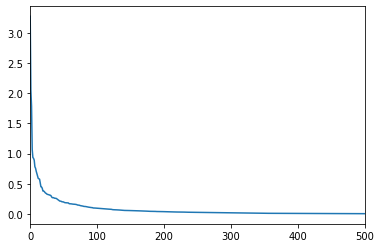

In [205]:
plt.plot(list(range(len(dfOD))), dfOD["abs_diff"]); plt.xlim([0,500])

(0, 500)

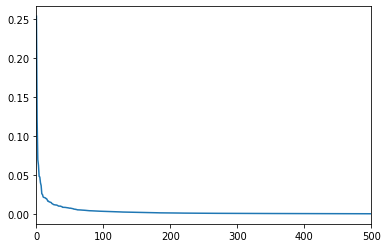

In [195]:
plt.plot(list(range(len(dfOD))), dfOD["abs_diff"]); plt.xlim([0,500])

# HERE NOW

In [258]:
print(bad_segs_optcost[:10])

['Canada5269', 'Iceland8268', 'Denmark7969', 'Finland9137', 'Finland9139', 'Ireland8493', 'Ireland8525', 'Ireland8489', 'Ireland8490', 'Sweden9129']


In [267]:
dfO1.loc[(dfO1.time==1) & (dfO1.segments==bad_segs_optcost[k]),"variable"].iloc[0]

'NoAdaptCost'

In [270]:
for k in range(100):
    if(dfO1.loc[(dfO1.time==1) & (dfO1.segments==bad_segs_optcost[k]),"variable"].iloc[0]!="NoAdaptCost"):
        print(dfO1.loc[(dfO1.time==1) & (dfO1.segments==bad_segs_optcost[k]), ["segments","variable","level"]])

       segments     variable   level
914  Canada4035  RetreatCost  1000.0
                segments     variable  level
10572  UnitedKingdom8652  RetreatCost  100.0
                segments     variable   level
10489  UnitedKingdom8510  RetreatCost  1000.0
                segments     variable   level
10575  UnitedKingdom8655  RetreatCost  1000.0
                segments     variable  level
10626  UnitedKingdom8706  RetreatCost    1.0
                segments     variable  level
10630  UnitedKingdom8710  RetreatCost    1.0
                segments     variable  level
10639  UnitedKingdom8719  RetreatCost   10.0
                segments     variable  level
10688  UnitedKingdom8768  RetreatCost    1.0
                segments     variable  level
10698  UnitedKingdom8778  RetreatCost  100.0
                segments     variable  level
10729  UnitedKingdom8839  ProtectCost   10.0
     segments     variable  level
6  Albania495  RetreatCost   10.0
       segments     variable    level
830  C

In [275]:
dfO1.loc[(dfO1.time==1) & (dfO1.segments==bad_segs_optcost[0])]

,time,regions,segments,variable,level,OptimalCost
1095,1,CAN,Canada5269,NoAdaptCost,0.0,0.000193


In [272]:
dfN1.loc[(dfN1.variable=="OptimalCost") & (dfN1.time==t) & (dfN1.segments==bad_segs_optcost[0])]

,time,regions,segments,level,variable,value
972935,1,CAN,Canada5269,NaN,OptimalCost,0.000193


In [257]:
dfG85.loc[(dfG85.variable=="OptimalFixedCost") & (dfG85.time==t) & (dfG85.segments==seg), "value"]

869103    0.000518
Name: value, dtype: float64

In [253]:
tol = 0.0001
t = 1
segments_g = list(dfG85.loc[(dfG85.variable=="OptimalFixedCost") & (dfG85.time==t), "segments"].unique())
bad_segs_optcost = []
for seg in segments_g:
    N = float(dfN1.loc[(dfN1.variable=="OptimalCost") & (dfN1.time==t) & (dfN1.segments==seg), "value"])
    D = float(dfG85.loc[(dfG85.variable=="OptimalFixedCost") & (dfG85.time==t) & (dfG85.segments==seg), "value"])
    abs_diff = np.abs(N-D)
    if (abs_diff > tol):
        print(seg,N,D,abs_diff)
        bad_segs_optcost.append(seg)
#    if minlevel > 1:
#        cnt += 1

Canada5269 0.0001930222211254561 0.00035176699999999995 0.00015874477887454385
Iceland8268 0.000356325206163966 0.000500366 0.00014404079383603403
Denmark7969 0.0001656455871156991 0.000401053 0.00023540741288430092
Finland9137 5.555936730015516e-08 0.000147233 0.00014717744063269986
Finland9139 2.9214965267749207e-05 0.001202596 0.0011733810347322507
Ireland8493 0.005479788282786261 0.015539011 0.01005922271721374
Ireland8525 0.0003916630282420765 0.000872258 0.0004805949717579235
Ireland8489 0.004156850332047942 0.017574926 0.01341807566795206
Ireland8490 0.0003300172002126115 0.001120245 0.0007902277997873885
Sweden9129 0.0007966218227833416 0.00206759 0.0012709681772166582
UnitedStates3399 0.02961761397791415 0.06601434 0.03639672602208585
UnitedStates5055 3.7533962426674345e-06 0.000351291 0.00034753760375733257
UnitedStates5073 0.00028331596379639964 0.00102539 0.0007420740362036003
UnitedStates5078 7.559699863554435e-05 0.000649109 0.0005735120013644557
UnitedStates5088 0.000274

TypeError: cannot convert the series to <class 'float'>

ABOVE - also check Albania495, should be a bad segment

In [173]:
segments = list(dfN1.segments.unique())
t = 1
for seg in segments[:10]:
    print(float(dfG85.loc[(dfG85.variable=="OptimalFixedCost") & (dfG85.time==t) & (dfG85.segments==seg), "value"])-
          float(dfN1.loc[(dfN1.variable=="OptimalCost") & (dfN1.time==t) & (dfN1.segments==seg), "value"]))

4.6251961505552885e-10
-1.477893884957002e-05
3.335419072013346e-11
-1.3710506026939212e-10
-3.651971270033269e-08
3.2326304489138034e-08
-0.00011523826904854368
4.668929255800119e-10
4.035707712905448e-08
2.7510545927357695e-10


FloodProtect isn't on the output files

Same number of wetland segments:

In [154]:
len(segments_wetland) # diaz

3119

In [155]:
len(dfN1.loc[(dfN1.variable=="WetlandProtect") & (dfN1.value > 0),"segments"].unique()) # new ciam

3119

Wetland Protect matches!

In [165]:
t=1; var="WetlandProtect"
tot= 0
for seg in segments_wetland:
    tot += dfG85.loc[(dfG85.variable==var) & (dfG85.time==t) & (dfG85.segments==seg), "value"].iloc[0]
print(tot)

175.01217636309943


In [164]:
dfG85.loc[(dfG85.variable==var) & (dfG85.time==t) & (dfG85.segments==seg), "value"].iloc[0]

0.196488114

In [162]:
t = 1
var = "WetlandProtect"
for seg in segments_wetland[:50]:
    print(float(dfG85.loc[(dfG85.variable==var) & (dfG85.time==t) & (dfG85.segments==seg), "value"].iloc[0]-
          dfN1.loc[(dfN1.variable==var) & (dfN1.time==t) & (dfN1.segments==seg), "value"]))

3.726311273433147e-11
4.0450205175419224e-10
1.489695311551742e-10
-2.8701975670307467e-10
4.526252983527712e-10
4.1145922633594037e-08
5.729613167974215e-11
-2.650222232425045e-10
3.81126460205787e-08
-3.8876904473461593e-10
2.5368278853445114e-10
4.1350919823684995e-10
1.7306985011789067e-10
-6.476408298539127e-11
4.3455961398763954e-10
3.03911971977211e-10
4.778756956119734e-10
-1.816496462796191e-10
2.759707453878213e-10
9.252789333336064e-11
-2.8378921435034954e-10
3.338221895904294e-10
-3.917666937386377e-10
-4.245401113989189e-10
-1.648131587803081e-10
-7.110942059794165e-11
-1.3398238941919605e-10
3.0870378388975217e-10
2.796665676818577e-10
2.555686148819625e-10
3.6461208358096187e-10
8.406665359499133e-11
1.3620327088403883e-11
-2.72349254260007e-10
-4.98295404938176e-10
3.544608495609225e-10
-3.26627835889326e-10
-2.566444834428694e-10
-9.767808784033605e-11
4.10400158301627e-10
1.7724799405982594e-10
-2.180448890019837e-10
1.4722811142973968e-10
1.30831752712373e-10
5.11830

In [163]:
dfG85.loc[(dfG85.variable=="WetlandProtect") & (dfG85.segments==segments_wetland[0])]

,time,segments,level,variable,value
355398,1,Canada5115,NaN,WetlandProtect,0.002589
355401,2,Canada5115,NaN,WetlandProtect,0.002917
355404,3,Canada5115,NaN,WetlandProtect,0.003244
355407,4,Canada5115,NaN,WetlandProtect,0.003497
355410,5,Canada5115,NaN,WetlandProtect,0.003755
355413,6,Canada5115,NaN,WetlandProtect,0.004017
355416,7,Canada5115,NaN,WetlandProtect,0.004281
355419,8,Canada5115,NaN,WetlandProtect,0.004542
355422,9,Canada5115,NaN,WetlandProtect,0.004797
355425,10,Canada5115,NaN,WetlandProtect,0.005077


In [146]:
dfN1.loc[(dfN1.variable=="WetlandProtect") & (dfN1.time==1)]

,time,regions,segments,level,variable,value
1214800,1,ALB,Albania489,NaN,WetlandProtect,0.000047
1214801,1,ALB,Albania490,NaN,WetlandProtect,0.000000
1214802,1,ALB,Albania491,NaN,WetlandProtect,0.000208
1214803,1,ALB,Albania492,NaN,WetlandProtect,0.000199
1214804,1,ALB,Albania493,NaN,WetlandProtect,0.000000
1214805,1,ALB,Albania494,NaN,WetlandProtect,0.000000
1214806,1,ALB,Albania495,NaN,WetlandProtect,0.000135
1214807,1,ALB,Albania496,NaN,WetlandProtect,0.000000
1214808,1,ALB,Albania497,NaN,WetlandProtect,0.000000
1214809,1,ALB,Albania498,NaN,WetlandProtect,0.000085


In [ ]:
dfC1.loc[(dfC11)]

In [114]:
dfNew = pd.DataFrame()
dfNew["time"] = list(range(2010,2210,20))
for var in ["NoAdaptCost", "OptimalCost", "Construct", "RelocateRetreat",
            "FloodNoAdapt", "RelocateNoAdapt", "StormCapitalNoAdapt", "StormPopNoAdapt", "WetlandNoAdapt",
            "ProtectCost", "WetlandProtect", "StormPopProtect", "StormCapitalProtect",
            "RetreatCost", "WetlandRetreat", "StormPopRetreat", "StormCapitalRetreat", "RelocateRetreat"]:
    dfNew[var] = list(dfC.loc[dfC["variable"]==var, "value"])

ValueError: Length of values does not match length of index

Check that these 5 match the NoAdapt total cost:

In [136]:
dfNew["FloodNoAdapt"]+dfNew["RelocateNoAdapt"]+dfNew["StormCapitalNoAdapt"]+dfNew["StormPopNoAdapt"]+dfNew["WetlandNoAdapt"]-dfNew["NoAdapt"]

0   -2.842171e-13
1    1.762146e-12
2    6.252776e-13
3   -3.126388e-12
4    5.115908e-12
5    1.136868e-12
6    3.410605e-12
7   -8.185452e-12
8   -7.503331e-12
9   -4.092726e-12
dtype: float64

In [159]:
dfG85["variable"].unique()

array(['FloodRetreat', 'RetreatCost', 'WetlandRetreat', 'RelocateRetreat',
       'StormCapitalRetreat', 'StormPopRetreat', 'Construct',
       'ProtectCost', 'WetlandProtect', 'StormCapitalProtect',
       'StormPopProtect', 'FloodNoAdapt', 'NoAdaptCost', 'WetlandNoAdapt',
       'RelocateNoAdapt', 'StormCapitalNoAdapt', 'StormPopNoAdapt',
       'FloodOptimalFixed', 'OptimalFixedCost', 'WetlandOptimalFixed',
       'RelocateOptimalFixed', 'StormCapitalOptimalFixed',
       'StormPopOptimalFixed', 'ConstructOptimalFixed'], dtype=object)

In [160]:
dfC["variable"].unique()

array(['FloodNoAdapt', 'RelocateNoAdapt', 'StormCapitalNoAdapt',
       'NoAdaptCost', 'OptimalCost', 'WetlandProtect', 'StormPopNoAdapt',
       'WetlandRetreat', 'WetlandNoAdapt', 'StormPopProtect',
       'StormCapitalProtect', 'ProtectCost', 'Construct',
       'StormCapitalRetreat', 'StormPopRetreat', 'RetreatCost',
       'FloodRetreat', 'RelocateRetreat'], dtype=object)

In [163]:
len(dfG85["segments"].unique())

12148

In [112]:
for col in dfNew.columns:
    print(col+"\nYear| Diaz | New CIAM | Diaz-New")
    for t in dfDiaz["time"]:
        print(t, np.round(float(dfDiaz.loc[dfDiaz["time"]==t, col]),3), np.round(float(dfNew.loc[dfNew["time"]==t, col]),3), 
              np.round(float(dfDiaz.loc[dfDiaz["time"]==t, col]-dfNew.loc[dfNew["time"]==t, col]),3))
    print("")

NameError: name 'dfNew' is not defined

In [127]:
x = compare(dfG85, dfC, var="WetlandRetreat", lev=False, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 2.741 2.091
2 8.049 5.569
3 17.055 10.596
4 30.388 17.749
5 53.651 29.068
6 82.467 43.161
7 108.99 56.616
8 131.135 68.265
9 135.653 69.896
10 151.855 78.087
11 185.589 96.493


In [120]:
#segments_test = ["UnitedKingdom8819", "Sweden9129", "Ireland8492", "UnitedStates3383", "Canada5106", "Denmark7923", "Denmark7037"]
dfS = pd.read_csv("./ciam-code/data/subsets/sub1names.csv", header=None)
segments_test = list(dfS[0])

In [22]:
dfG2 = dfG85.loc[dfG85["segments"].isin(segments_test),:]

In [121]:
x = compare(dfG85, dfC, var="Construct", lev=10, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 177.491 177.491
2 177.491 177.491
3 177.491 177.491
4 177.491 177.491
5 300.823 300.823
6 300.823 300.823
7 300.823 300.823
8 300.823 300.823
9 300.823 300.823
10 521.828 521.828
11 521.828 521.828


In [288]:
dfC2["variable"].unique()

array(['FloodNoAdapt', 'RelocateNoAdapt', 'StormCapitalNoAdapt',
       'NoAdaptCost', 'OptimalCost', 'WetlandProtect', 'StormPopNoAdapt',
       'WetlandRetreat', 'WetlandNoAdapt', 'StormPopProtect',
       'StormCapitalProtect', 'ProtectCost', 'Construct',
       'StormCapitalRetreat', 'StormPopRetreat', 'RetreatCost',
       'FloodRetreat', 'RelocateRetreat'], dtype=object)

In [289]:
dfG2["variable"].unique()

array(['FloodRetreat', 'RetreatCost', 'RelocateRetreat',
       'StormCapitalRetreat', 'StormPopRetreat', 'WetlandRetreat',
       'Construct', 'ProtectCost', 'StormCapitalProtect',
       'StormPopProtect', 'WetlandProtect', 'FloodNoAdapt', 'NoAdaptCost',
       'RelocateNoAdapt', 'StormCapitalNoAdapt', 'StormPopNoAdapt',
       'WetlandNoAdapt', 'FloodOptimalFixed', 'OptimalFixedCost',
       'RelocateOptimalFixed', 'StormCapitalOptimalFixed',
       'StormPopOptimalFixed', 'WetlandOptimalFixed'], dtype=object)

In [340]:
float(dfN2.loc[(dfN2.variable=="OptimalCost") & (dfN2.time==13) & (dfN2.segments=="Sweden9129"), "value"]) - \
float(dfG2.loc[(dfG2.variable=="OptimalFixedCost") & (dfG2.time==13) & (dfG2.segments=="Sweden9129"), "value"])

0.01624851563499108

In [376]:
float(dfN2.loc[(dfN2.variable=="RetreatCost") & (dfN2.time==13) & (dfN2.level==10) & (dfN2.segments==segments_test[0]), "value"])

0.0015456638775497278

In [446]:
tol = 0.0001
lev = 10
t = 1
for seg in segments_test:
#    minlevel = dfN2.loc[(dfN2.variable=="RetreatCost") & (dfN2.time==t) & (dfN2.segments==seg), "level"].min()
    N = float(dfN2.loc[(dfN2.variable=="Construct") & (dfN2.time==t) & (dfN2.level==lev) & (dfN2.segments==seg), "value"])
    D = float(dfG2.loc[(dfG2.variable=="Construct") & (dfG2.time==t) & (dfG2.level==lev) & (dfG2.segments==seg), "value"])
    if (np.abs(N-D) > tol):
        print(seg,N,D)
#    if minlevel > 1:
#        cnt += 1

Canada5527 0.004040049401722718 0.056436152
Canada5687 0.0005090303345894624 0.005378783000000001
Canada5691 0.0023110227253425727 0.033551626
Canada5698 7.45997455923003e-05 0.007842693000000001
Finland9131 0.002290062791981559 0.006076201
Finland9137 0.00013856395260966722 0.0006650289999999999
Finland9138 0.008031941393879784 0.029487435
Finland9139 0.00010182675006077281 0.000557137
Finland9141 0.002310969919072248 0.007019585
Norway8935 0.0 0.009717973000000001
Norway8936 0.0 0.009549451
Norway8944 0.0 0.05078472
Norway8946 0.0 0.308962127
Norway8947 0.0 0.005926501999999999
Norway8948 0.0 0.01753626
Norway8949 0.0 0.001768751
Norway8950 0.0 0.001450895
Norway8951 0.0 0.000693165
Norway8952 0.0 0.0066607540000000005
Norway8953 0.0 0.003687401
Norway8954 0.0 0.003861567
Norway8955 0.0 0.003183978
Norway8956 0.0 0.002105909
Norway8957 0.0 0.001047367
Norway8958 0.0 0.007419499999999999
Norway8959 0.0 0.001574155
Norway8960 0.0 0.024964677
Norway8961 6.63770647035457e-06 0.000523944


In [439]:
cnt

79

### Checking all RetreatCost, or other quantities with `levels`, for a certain time

In [282]:
segments_test = ["UnitedKingdom8819", "Sweden9129", "Ireland8492", "UnitedStates3383", "Canada5106", "Denmark7923", "Denmark7037"]
dfG2 = dfG85.loc[dfG85["segments"].isin(segments_test),:]

In [285]:
x = compare(dfG2, dfC2, var="Construct", lev=10, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 0.412 171.4
2 0.412 171.4
3 0.412 171.4
4 0.412 171.4
5 0.663 286.659
6 0.663 286.659
7 0.663 286.659
8 0.663 286.659
9 0.663 286.659
10 1.009 510.093
11 1.009 510.093


In [288]:
tol = 0.0001
bad_segs_retreat = []
var = "RetreatCost"
t = 1
for seg in segments_test:
    levels = dfG85.loc[(dfG85.time==t) & (dfG85.variable==var) & (dfG85.segments==seg), "level"].unique()
    D = [float(dfG85.loc[(dfG85.variable==var) & (dfG85.level==lev) & (dfG85.time==t) & (dfG85.segments==seg), "value"]) for lev in levels]
    N = [float(dfN1.loc[(dfN1.variable==var) & (dfN1.level==lev) & (dfN1.time==t) & (dfN1.segments==seg), "value"]) for lev in levels]
    max_err = np.max([N[i] - D[i] for i in range(len(levels))])
    if max_err > tol:
        bad_segs_retreat.append(seg)
        print(seg, D, N, max_err)
#    else:
        #print(seg, max_err)

### Checking all ProtectCost

In [292]:
tol = 0.0001
bad_segs_protect = []
var = "ProtectCost"
t = 1
segments_g = list(dfG85.loc[(dfG85.variable==var) & (dfG85.time==1), "segments"].unique())
for seg in segments_g:
    levels = dfG85.loc[(dfG85.time==t) & (dfG85.variable==var) & (dfG85.segments==seg), "level"].unique()
    D = [float(dfG85.loc[(dfG85.variable==var) & (dfG85.level==lev) & (dfG85.time==t) & (dfG85.segments==seg), "value"]) for lev in levels]
    N = [float(dfN1.loc[(dfN1.variable==var) & (dfN1.level==lev) & (dfN1.time==t) & (dfN1.segments==seg), "value"]) for lev in levels]
    max_err = np.max([N[i] - D[i] for i in range(len(levels))])
    if max_err > tol:
        bad_segs_protect.append(seg)
        print(seg, D, N, max_err)
#    else:
        #print(seg, max_err)

KeyboardInterrupt: 

### Checking all NoAdaptCost

In [ ]:
tol = 0.0001
bad_segs_noadapt = []
var = "NoAdaptCost"
segments_g = list(dfG85.loc[(dfG85.variable==var) & (dfG85.time==1), "segments"].unique())
for seg in segments_g:
    D = [float(dfG85.loc[(dfG85.variable==var) & (dfG85.time==t) & (dfG85.segments==seg), "value"].iloc[0]) for t in range(1,11)]
    N = [float(dfN1.loc[(dfN.variable==var) & (dfN1.time==t) & (dfN1.segments==seg), "value"]) for t in range(1,11)]
    max_err = np.max([N[i] - D[i] for i in range(len(N))])
    if max_err > tol:
        bad_segs_noadapt.append(seg)
        print(seg, D, N, max_err)
#    else:
        #print(seg, max_err)

# HERE NOW!! 

Above - check that retreatcost and protectcost match up perfectly, for the return periods that are present.

In [28]:
bad_segs_protect = bad_segs.copy()

In [29]:
len(bad_segs_protect)

183

ProtectCost is composed of:
`                                v.ProtectCost[tj,m,i-1] = v.Construct[tj,m,i-1] + v.WetlandProtect[tj,m] + v.StormCapitalProtect[tj,m,i-1] + v.StormPopProtect[tj,m,i-1] + v.FloodProtect[tj,m]
`

So check those

In [24]:
tol = 0.0001
bad_segs = []
var = "Construct"
t = 1
for seg in segments_test:
    levels = dfG2.loc[(dfG2.time==t) & (dfG2.variable==var) & (dfG2.segments==seg), "level"].unique()
    if (len(levels) > 0):
        D = [float(dfG2.loc[(dfG2.variable==var) & (dfG2.level==lev) & (dfG2.time==t) & (dfG2.segments==seg), "value"]) for lev in levels]
        N = [float(dfN2.loc[(dfN2.variable==var) & (dfN2.level==lev) & (dfN2.time==t) & (dfN2.segments==seg), "value"]) for lev in levels]
        max_err = np.max([N[i] - D[i] for i in range(len(levels))])
        if max_err > tol:
            bad_segs.append(seg)
            print(seg, max_err, "<========================")
    else:
        N = list(dfN2.loc[(dfN2.variable==var) & (dfN2.time==t) & (dfN2.segments==seg), "value"])
        if np.abs(np.median(N)) > tol/10:
            bad_segs.append(seg)
            print(seg, N, "<============ no Construct value issue")

Canada5527 0.1893652968916057 <========================
Canada5687 0.018379222159555675 <========================
Canada5691 0.11234703253702003 <========================
Canada5698 0.024907150539546515 <========================
Norway8935 0.07640089158612114 <========================
Norway8936 0.07654756517568732 <========================
Norway8944 0.39986198614248014 <========================
Norway8946 2.383589149912153 <========================
Norway8947 0.047441195449225565 <========================
Norway8948 0.13590917641936595 <========================
Norway8949 0.013635878728116748 <========================
Norway8950 0.011377199866797347 <========================
Norway8951 0.00545711443805138 <========================
Norway8952 0.052758567206560844 <========================
Norway8953 0.028897040303193535 <========================
Norway8954 0.029853595454764688 <========================
Norway8955 0.024783529937449582 <========================
Norway8956 0.016467943067

In [26]:
bad_segs_construct = bad_segs.copy()

In [25]:
len(bad_segs)

183

In [34]:
len(set.intersection(set(bad_segs_construct), set(bad_segs_protect)))

183

In [36]:
lslr = pd.read_csv("ciam-code/data/lslr/lsl_rcp85_p50.csv")

In [37]:
lslr[bad_segs]

,Canada5527,Canada5687,Canada5691,Canada5698,Norway8935,Norway8936,Norway8944,Norway8946,Norway8947,Norway8948,...,UnitedStates5033,UnitedStates5034,UnitedStates5035,UnitedStates5036,UnitedStates5037,UnitedStates5038,UnitedStates5049,UnitedStates5052,UnitedStates5053,UnitedStates5060
0,-0.071469,-0.071469,-0.071469,-0.071469,-0.10376,-0.10376,-0.10376,-0.10376,-0.10825,-0.10825,...,-0.022999,-0.022999,-0.022999,-0.022999,-0.022999,-0.022999,-0.12197,-0.12197,-0.12197,-0.12197
1,-0.140090,-0.140090,-0.140090,-0.140090,-0.21656,-0.21656,-0.21656,-0.21656,-0.22351,-0.22351,...,-0.042212,-0.042212,-0.042212,-0.042212,-0.042212,-0.042212,-0.23787,-0.23787,-0.23787,-0.23787
2,-0.198400,-0.198400,-0.198400,-0.198400,-0.33721,-0.33721,-0.33721,-0.33721,-0.34550,-0.34550,...,-0.059633,-0.059633,-0.059633,-0.059633,-0.059633,-0.059633,-0.34831,-0.34831,-0.34831,-0.34831
3,-0.255160,-0.255160,-0.255160,-0.255160,-0.46809,-0.46809,-0.46809,-0.46809,-0.47753,-0.47753,...,-0.071475,-0.071475,-0.071475,-0.071475,-0.071475,-0.071475,-0.45139,-0.45139,-0.45139,-0.45139
4,-0.303230,-0.303230,-0.303230,-0.303230,-0.61178,-0.61178,-0.61178,-0.61178,-0.62323,-0.62323,...,-0.076751,-0.076751,-0.076751,-0.076751,-0.076751,-0.076751,-0.54345,-0.54345,-0.54345,-0.54345
5,-0.347380,-0.347380,-0.347380,-0.347380,-0.76000,-0.76000,-0.76000,-0.76000,-0.77118,-0.77118,...,-0.084361,-0.084361,-0.084361,-0.084361,-0.084361,-0.084361,-0.63017,-0.63017,-0.63017,-0.63017
6,-0.385460,-0.385460,-0.385460,-0.385460,-0.90851,-0.90851,-0.90851,-0.90851,-0.91771,-0.91771,...,-0.085644,-0.085644,-0.085644,-0.085644,-0.085644,-0.085644,-0.70585,-0.70585,-0.70585,-0.70585
7,-0.414230,-0.414230,-0.414230,-0.414230,-1.02420,-1.02420,-1.02420,-1.02420,-1.03380,-1.03380,...,-0.086397,-0.086397,-0.086397,-0.086397,-0.086397,-0.086397,-0.78054,-0.78054,-0.78054,-0.78054
8,-0.443950,-0.443950,-0.443950,-0.443950,-1.11770,-1.11770,-1.11770,-1.11770,-1.12590,-1.12590,...,-0.089366,-0.089366,-0.089366,-0.089366,-0.089366,-0.089366,-0.85512,-0.85512,-0.85512,-0.85512
9,-0.493440,-0.493440,-0.493440,-0.493440,-1.17090,-1.17090,-1.17090,-1.17090,-1.18285,-1.18285,...,-0.092963,-0.092963,-0.092963,-0.092963,-0.092963,-0.092963,-0.93271,-0.93271,-0.93271,-0.93271


In [41]:
any(lslr[seg] < 0)

False

In [56]:
neg_slr_segs = []
for seg in segments_test:
    if any(lslr[seg] < 0):
        neg_slr_segs.append(seg)

In [57]:
len(neg_slr_segs)

265

In [58]:
len(set.intersection(set(bad_segs_construct), set(neg_slr_segs)))

183

In [63]:
neg_slr_segs_okay = list(set.difference(set(neg_slr_segs), set(bad_segs_construct)))

In [96]:
dfO2.loc[(dfO2.segments=="UnitedStates5005")]

,time,regions,segments,variable,level,OptimalCost
916,1,USA,UnitedStates5005,RetreatCost,1.0,0.000005
1916,2,USA,UnitedStates5005,RetreatCost,1.0,0.000004
2916,3,USA,UnitedStates5005,RetreatCost,1.0,0.000004
3916,4,USA,UnitedStates5005,RetreatCost,1.0,0.000003
4916,5,USA,UnitedStates5005,RetreatCost,1.0,0.000100
5916,6,USA,UnitedStates5005,RetreatCost,1.0,0.000101
6916,7,USA,UnitedStates5005,RetreatCost,1.0,0.000103
7916,8,USA,UnitedStates5005,RetreatCost,1.0,0.000106
8916,9,USA,UnitedStates5005,RetreatCost,1.0,0.000109
9916,10,USA,UnitedStates5005,RetreatCost,1.0,0.001294


In [92]:
for seg in neg_slr_segs_okay:
    if any(["Protect" in list(dfO2.loc[(dfO2.segments==seg), "variable"])[k] for k in range(20)]):
        print(seg)

Norway9120


In [95]:
lslr[neg_slr_segs_okay]

,Canada5179,UnitedStates5005,UnitedStates5048,Denmark7049,UnitedStates5059,UnitedStates4986,Canada5174,Denmark7044,UnitedStates5001,Canada5172,...,Canada5173,Canada5267,UnitedStates4997,UnitedStates4989,UnitedStates5041,Canada5268,Denmark7038,Canada5181,UnitedStates5054,Canada5265
0,0.007041,-0.032237,-0.011936,0.007041,-0.011936,-0.032237,0.007041,0.007041,-0.032237,0.007041,...,0.007041,0.007041,-0.032243,-0.000007,-0.019666,0.007041,0.007041,0.007041,-0.011936,0.007041
1,0.015069,-0.054536,-0.016001,0.015069,-0.016001,-0.054536,0.015069,0.015069,-0.054536,0.015069,...,0.015069,0.015069,-0.054488,0.007697,-0.034585,0.015069,0.015069,0.015069,-0.016001,0.015069
2,0.020366,-0.072207,-0.015957,0.020366,-0.015957,-0.072207,0.020366,0.020366,-0.072207,0.020366,...,0.020366,0.020366,-0.072273,0.024322,-0.049288,0.020366,0.020366,0.020366,-0.015957,0.020366
3,0.021083,-0.082081,-0.008083,0.021083,-0.008083,-0.082081,0.021083,0.021083,-0.082081,0.021083,...,0.021083,0.021083,-0.082215,0.045070,-0.059956,0.021083,0.021083,0.021083,-0.008083,0.021083
4,0.027462,-0.080351,0.011482,0.027462,0.011482,-0.080351,0.027462,0.027462,-0.080351,0.027462,...,0.027462,0.027462,-0.080441,0.073107,-0.062901,0.027462,0.027462,0.027462,0.011482,0.027462
5,0.031487,-0.072054,0.035866,0.031487,0.035866,-0.072054,0.031487,0.031487,-0.072054,0.031487,...,0.031487,0.031487,-0.072265,0.116140,-0.067990,0.031487,0.031487,0.031487,0.035866,0.031487
6,0.026907,-0.050762,0.071242,0.026907,0.071242,-0.050762,0.026907,0.026907,-0.050762,0.026907,...,0.026907,0.026907,-0.050591,0.175470,-0.067013,0.026907,0.026907,0.026907,0.071242,0.026907
7,0.026660,-0.023875,0.108590,0.026660,0.108590,-0.023875,0.026660,0.026660,-0.023875,0.026660,...,0.026660,0.026660,-0.024125,0.239320,-0.066155,0.026660,0.026660,0.026660,0.108590,0.026660
8,0.024688,0.007056,0.147370,0.024688,0.147370,0.007056,0.024688,0.024688,0.007056,0.024688,...,0.024688,0.024688,0.006789,0.301760,-0.067970,0.024688,0.024688,0.024688,0.147370,0.024688
9,-0.003910,0.020746,0.183335,-0.003910,0.183335,0.020746,-0.003910,-0.003910,0.020746,-0.003910,...,-0.003910,-0.003910,0.020521,0.335640,-0.069875,-0.003910,-0.003910,-0.003910,0.183335,-0.003910


In [73]:
dfG2.loc[(dfG2.segments==neg_slr_segs_okay[0]) & (dfG2.variable=="Construct") & (dfG2.level==10)]

,time,segments,level,variable,value
355978,1,Canada5179,10.0,Construct,0.013536
355980,2,Canada5179,10.0,Construct,0.013536
355982,3,Canada5179,10.0,Construct,0.013536
355984,4,Canada5179,10.0,Construct,0.013536
355986,5,Canada5179,10.0,Construct,0.010400
355988,6,Canada5179,10.0,Construct,0.010400
355990,7,Canada5179,10.0,Construct,0.010400
355992,8,Canada5179,10.0,Construct,0.010400
355994,9,Canada5179,10.0,Construct,0.010400
355996,10,Canada5179,10.0,Construct,0.008102


### Checking all WetlandProtect, or other quantities without `levels`, over all times

In [124]:
seg

'Canada5265'

In [126]:
segments_wetland = dfG85.loc[(dfG2.variable==var) & (dfG85.time==1), "segments"].unique()

KeyboardInterrupt: 

In [123]:
tol = 0.0001
bad_segs = []
var = "WetlandProtect"
segments_wetland = dfG85.loc[(dfG2.variable==var) & (dfG85.time==1), "segments"].unique()
for seg in segments_wetland:
    D = [float(dfG85.loc[(dfG85.variable==var) & (dfG85.time==t) & (dfG85.segments==seg), "value"].iloc[0]) for t in range(1,15)]
    N = [float(dfN.loc[(dfN.variable==var) & (dfN.time==t) & (dfN.segments==seg), "value"]) for t in range(1,15)]
    max_err = np.max([N[i] - D[i] for i in range(len(N))])
    if max_err > tol:
        bad_segs.append(seg)
        print(seg, max_err, "<========================")
#    else:
        #print(seg, max_err)

ValueError: cannot reindex from a duplicate axis

In [549]:
tol = 0.0001
bad_segs = []
var = "StormCapitalProtect"
t = 1
for seg in segments_test:
    levels = dfG2.loc[(dfG2.time==t) & (dfG2.variable==var) & (dfG2.segments==seg), "level"].unique()
    if (len(levels) > 0):
        D = [float(dfG2.loc[(dfG2.variable==var) & (dfG2.level==lev) & (dfG2.time==t) & (dfG2.segments==seg), "value"]) for lev in levels]
        N = [float(dfN2.loc[(dfN2.variable==var) & (dfN2.level==lev) & (dfN2.time==t) & (dfN2.segments==seg), "value"]) for lev in levels]
        max_err = np.max([N[i] - D[i] for i in range(len(levels))])
        if max_err > tol:
            bad_segs.append(seg)
            print(seg, max_err, "<========================")
    else:
        N = list(dfN2.loc[(dfN2.variable==var) & (dfN2.time==t) & (dfN2.segments==seg), "value"])
        if np.abs(np.median(N)) > tol/10:
            bad_segs.append(seg)
            print(seg, N, "<============ no StormCapitalProtect value issue")

In [550]:
tol = 0.0001
bad_segs = []
var = "StormPopProtect"
t = 1
for seg in segments_test:
    levels = dfG2.loc[(dfG2.time==t) & (dfG2.variable==var) & (dfG2.segments==seg), "level"].unique()
    if (len(levels) > 0):
        D = [float(dfG2.loc[(dfG2.variable==var) & (dfG2.level==lev) & (dfG2.time==t) & (dfG2.segments==seg), "value"]) for lev in levels]
        N = [float(dfN2.loc[(dfN2.variable==var) & (dfN2.level==lev) & (dfN2.time==t) & (dfN2.segments==seg), "value"]) for lev in levels]
        max_err = np.max([N[i] - D[i] for i in range(len(levels))])
        if max_err > tol:
            bad_segs.append(seg)
            print(seg, max_err, "<========================")
    else:
        N = list(dfN2.loc[(dfN2.variable==var) & (dfN2.time==t) & (dfN2.segments==seg), "value"])
        if np.abs(np.median(N)) > tol/10:
            bad_segs.append(seg)
            print(seg, N, "<============ no StormPopProtect value issue")

In [556]:
tol = 0.0001
bad_segs = []
var = "FloodRetreat"
t = 1
for seg in segments_test:
    levels = dfG2.loc[(dfG2.time==t) & (dfG2.variable==var) & (dfG2.segments==seg), "level"].unique()
    if (len(levels) > 0):
        D = [float(dfG2.loc[(dfG2.variable==var) & (dfG2.level==lev) & (dfG2.time==t) & (dfG2.segments==seg), "value"]) for lev in levels]
        N = [float(dfN2.loc[(dfN2.variable==var) & (dfN2.level==lev) & (dfN2.time==t) & (dfN2.segments==seg), "value"]) for lev in levels]
        max_err = np.max([N[i] - D[i] for i in range(len(levels))])
        if max_err > tol:
            bad_segs.append(seg)
            print(seg, max_err, "<========================")
    else:
        N = list(dfN2.loc[(dfN2.variable==var) & (dfN2.time==t) & (dfN2.segments==seg), "value"])
        if np.abs(np.median(N)) > tol/10:
            bad_segs.append(seg)
            print(seg, N, "<============ no FloodRetreat value issue")

In [515]:
print(dfG2.loc[(dfG2.variable==var) & (dfG2.time==t) & (dfG2.segments==seg)])
print(dfN2.loc[(dfN2.variable==var) & (dfN2.time==t) & (dfN2.segments==seg)])

        time    segments    level     variable     value
385541     1  Canada3384     10.0  ProtectCost  0.087623
452281     1  Canada3384    100.0  ProtectCost  0.133994
517761     1  Canada3384   1000.0  ProtectCost  0.167694
583241     1  Canada3384  10000.0  ProtectCost  0.592483
        time regions    segments    level     variable     value
380000     1     CAN  Canada3384     10.0  ProtectCost  0.087623
400000     1     CAN  Canada3384    100.0  ProtectCost  0.133994
420000     1     CAN  Canada3384   1000.0  ProtectCost  0.167694
440000     1     CAN  Canada3384  10000.0  ProtectCost  0.592483
460000     1     CAN  Canada3384      0.0  ProtectCost  0.000007


In [2]:
df = pd.read_csv("./output/lslOld_pop0_seg_85p50ssp0fixed_control_all.csv")

In [3]:
df.time.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])